# The Cancer Gene Atlas Cancer (TCGA) - Colon Adenocarcinoma (COAD)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Wed Apr 25 13:08:56 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Colon adenocarcinoma [COAD]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3976,226,COAD,TCGA,14efca0c-882d-4fba-b15c-64af6e213b80,AA,70.0,Sigmoid Colon,41,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,"Yes, History of Prior Malignancy",Prostate,"Other, specify",Prior Malignancy,NaN,NO,NaN
TCGA-AA-3488,227,COAD,TCGA,6e9e0c2f-2ddb-40f1-8e8c-618119e62ec1,AA,58.0,Sigmoid Colon,76,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AA-A01D,228,COAD,TCGA,e2edbf3f-25d8-49aa-b656-2a59c3b99aeb,AA,47.0,Sigmoid Colon,33,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NO,NaN
TCGA-AZ-4682,276,COAD,TCGA,e588714a-7753-4c3c-abb6-eaf1aab53ab3,AZ,61.0,Sigmoid Colon,76,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NO,NaN
TCGA-AZ-4684,277,COAD,TCGA,cac80259-3a26-4a99-b0d3-13454068e6ed,AZ,49.0,NaN,76,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(459, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_COAD_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,471595bb-7119-4e48-9601-85416724cf75,7b2c8113-8006-4fc7-a3e3-8065d9f4854b,b9490617-ce2a-4c4f-856b-0fc1e8dafeb6,2aa6e280-d42e-4443-8ce1-fbd032d10178,7e77add9-c9c2-4f58-9abe-db2b3c5fc8d3,0f5307ae-29de-4802-be40-c0459cc76441,efe76f19-a282-41ac-ac73-23499ec2f88b,e97d0b3a-d101-44eb-b157-64b6d63c7e3f,af07eb30-0f05-4e58-80cf-ddc1d3ed0664,4346e5d9-fa2a-4195-ac43-df29c425ca72,...,e7993f67-fa59-4565-8974-6a6a2f9db81d,4d22a808-ac64-454b-9701-df2289b5c352,b1dc62f2-f5f9-4da6-927f-2a5f54dcfb17,3ebd8695-7adc-4289-b8e5-669c35201b72,157a7846-fe7e-44f2-b959-da8df9fd2744,b69031dd-3646-4df6-9230-0d7377d716fd,e3ec77ba-d1e8-44fb-95e7-d0d76df9f1db,af455dae-0505-49d8-adc4-6b6cac4dc1c6,913e5b58-fe3d-4535-be6d-164f85d1db84,5588f427-ddef-4938-a105-6411074bffa3
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,141.0720,138.819000,112.865000,183.297000,155.960000,140.768000,129.564000,159.205000,155.071000,131.896000,...,179.377000,166.1960,148.07300,145.4160,167.6430,210.370000,150.3710,107.926000,115.9050,124.252000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,23.3414,25.259200,46.550200,26.248200,33.802500,57.942600,65.924100,44.429200,37.758600,23.619500,...,38.037500,25.0783,31.85350,44.9405,31.7775,32.929600,0.0000,31.763400,23.4957,34.474200
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,57.3935,37.958400,68.445600,42.324300,40.783200,59.509500,31.452000,39.087700,52.970900,68.914200,...,70.507800,22.2325,73.12280,50.2188,40.8724,76.809400,77.9158,50.129800,60.8274,68.956400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,47.3652,73.293500,46.632500,87.737300,53.778600,84.107200,105.949000,69.783700,58.034100,36.665400,...,62.261400,45.6310,40.23440,54.8203,65.4769,51.352900,58.6234,59.967800,72.2189,62.281400
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.264335,0.762921,0.363993,0.385187,0.175006,0.669779,0.186833,0.280246,0.853261,...,0.050456,0.0000,0.18852,0.0000,0.0000,0.064092,0.0000,0.447444,0.0000,0.139021


In [19]:
matrix.shape

(199169, 546)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,471595bb-7119-4e48-9601-85416724cf75,7b2c8113-8006-4fc7-a3e3-8065d9f4854b,b9490617-ce2a-4c4f-856b-0fc1e8dafeb6,2aa6e280-d42e-4443-8ce1-fbd032d10178,7e77add9-c9c2-4f58-9abe-db2b3c5fc8d3,0f5307ae-29de-4802-be40-c0459cc76441,efe76f19-a282-41ac-ac73-23499ec2f88b,e97d0b3a-d101-44eb-b157-64b6d63c7e3f,af07eb30-0f05-4e58-80cf-ddc1d3ed0664,4346e5d9-fa2a-4195-ac43-df29c425ca72,...,e7993f67-fa59-4565-8974-6a6a2f9db81d,4d22a808-ac64-454b-9701-df2289b5c352,b1dc62f2-f5f9-4da6-927f-2a5f54dcfb17,3ebd8695-7adc-4289-b8e5-669c35201b72,157a7846-fe7e-44f2-b959-da8df9fd2744,b69031dd-3646-4df6-9230-0d7377d716fd,e3ec77ba-d1e8-44fb-95e7-d0d76df9f1db,af455dae-0505-49d8-adc4-6b6cac4dc1c6,913e5b58-fe3d-4535-be6d-164f85d1db84,5588f427-ddef-4938-a105-6411074bffa3
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,141.0720,138.819000,112.865000,183.297000,155.960000,140.768000,129.564000,159.205000,155.071000,131.896000,...,179.377000,166.1960,148.07300,145.4160,167.6430,210.370000,150.3710,107.926000,115.9050,124.252000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,23.3414,25.259200,46.550200,26.248200,33.802500,57.942600,65.924100,44.429200,37.758600,23.619500,...,38.037500,25.0783,31.85350,44.9405,31.7775,32.929600,0.0000,31.763400,23.4957,34.474200
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,57.3935,37.958400,68.445600,42.324300,40.783200,59.509500,31.452000,39.087700,52.970900,68.914200,...,70.507800,22.2325,73.12280,50.2188,40.8724,76.809400,77.9158,50.129800,60.8274,68.956400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,47.3652,73.293500,46.632500,87.737300,53.778600,84.107200,105.949000,69.783700,58.034100,36.665400,...,62.261400,45.6310,40.23440,54.8203,65.4769,51.352900,58.6234,59.967800,72.2189,62.281400
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.264335,0.762921,0.363993,0.385187,0.175006,0.669779,0.186833,0.280246,0.853261,...,0.050456,0.0000,0.18852,0.0000,0.0000,0.064092,0.0000,0.447444,0.0000,0.139021


In [22]:
matrix.shape

(79930, 546)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-G4-6317-02,TCGA-G4-6299-01,TCGA-G4-6303-01,TCGA-G4-6322-01,TCGA-CM-6680-01,TCGA-D5-6532-01,TCGA-D5-6529-01,TCGA-AZ-6601-01,TCGA-AZ-6600-01,TCGA-AA-3518-11,...,TCGA-AY-A8YK-01,TCGA-NH-A6GC-01,TCGA-NH-A8F7-01,TCGA-NH-A8F7-06,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-NH-A8F8-01,TCGA-AA-3510-01,TCGA-AA-3675-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,141.0720,138.819000,112.865000,183.297000,155.960000,140.768000,129.564000,159.205000,155.071000,131.896000,...,179.377000,166.1960,148.07300,145.4160,167.6430,210.370000,150.3710,107.926000,115.9050,124.252000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,23.3414,25.259200,46.550200,26.248200,33.802500,57.942600,65.924100,44.429200,37.758600,23.619500,...,38.037500,25.0783,31.85350,44.9405,31.7775,32.929600,0.0000,31.763400,23.4957,34.474200
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,57.3935,37.958400,68.445600,42.324300,40.783200,59.509500,31.452000,39.087700,52.970900,68.914200,...,70.507800,22.2325,73.12280,50.2188,40.8724,76.809400,77.9158,50.129800,60.8274,68.956400
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,47.3652,73.293500,46.632500,87.737300,53.778600,84.107200,105.949000,69.783700,58.034100,36.665400,...,62.261400,45.6310,40.23440,54.8203,65.4769,51.352900,58.6234,59.967800,72.2189,62.281400
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.264335,0.762921,0.363993,0.385187,0.175006,0.669779,0.186833,0.280246,0.853261,...,0.050456,0.0000,0.18852,0.0000,0.0000,0.064092,0.0000,0.447444,0.0000,0.139021


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-G4-6317-02,TCGA-G4-6299-01,TCGA-G4-6303-01,TCGA-G4-6322-01,TCGA-CM-6680-01,TCGA-D5-6532-01,TCGA-D5-6529-01,TCGA-AZ-6601-01,TCGA-AZ-6600-01,TCGA-AA-3518-11,...,TCGA-AY-A8YK-01,TCGA-NH-A6GC-01,TCGA-NH-A8F7-01,TCGA-NH-A8F7-06,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-NH-A8F8-01,TCGA-AA-3510-01,TCGA-AA-3675-01
ARF5,141.0720,138.819000,112.865000,183.297000,155.960000,140.768000,129.564000,159.205000,155.071000,131.896000,...,179.377000,166.1960,148.07300,145.4160,167.6430,210.370000,150.3710,107.926000,115.9050,124.252000
M6PR,23.3414,25.259200,46.550200,26.248200,33.802500,57.942600,65.924100,44.429200,37.758600,23.619500,...,38.037500,25.0783,31.85350,44.9405,31.7775,32.929600,0.0000,31.763400,23.4957,34.474200
ESRRA,57.3935,37.958400,68.445600,42.324300,40.783200,59.509500,31.452000,39.087700,52.970900,68.914200,...,70.507800,22.2325,73.12280,50.2188,40.8724,76.809400,77.9158,50.129800,60.8274,68.956400
FKBP4,47.3652,73.293500,46.632500,87.737300,53.778600,84.107200,105.949000,69.783700,58.034100,36.665400,...,62.261400,45.6310,40.23440,54.8203,65.4769,51.352900,58.6234,59.967800,72.2189,62.281400
CYP26B1,0.0000,0.264335,0.762921,0.363993,0.385187,0.175006,0.669779,0.186833,0.280246,0.853261,...,0.050456,0.0000,0.18852,0.0000,0.0000,0.064092,0.0000,0.447444,0.0000,0.139021


# Histogram of First Sample

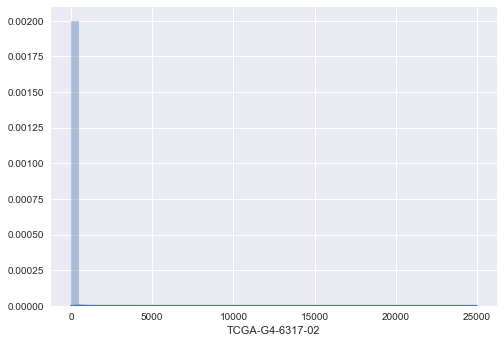

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

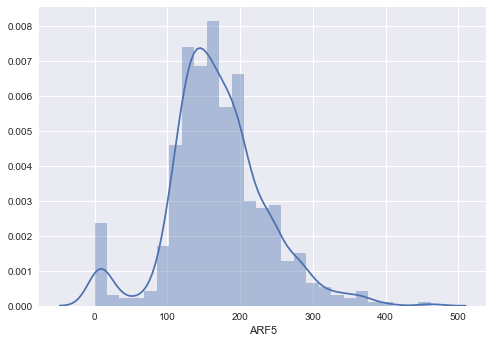

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_coad_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-G4-6317-02,TCGA-G4-6299-01,TCGA-G4-6303-01,TCGA-G4-6322-01,TCGA-CM-6680-01,TCGA-D5-6532-01,TCGA-D5-6529-01,TCGA-AZ-6601-01,TCGA-AZ-6600-01,TCGA-AA-3518-11,...,TCGA-AY-A8YK-01,TCGA-NH-A6GC-01,TCGA-NH-A8F7-01,TCGA-NH-A8F7-06,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-NH-A8F8-01,TCGA-AA-3510-01,TCGA-AA-3675-01
A1BG,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,...,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221,0.167221
A1CF,1.936690,1.002870,3.622490,1.932020,3.973860,6.789900,2.275030,1.008670,3.541960,5.983560,...,4.263110,2.356570,3.850560,6.068930,2.010240,2.214150,2.419180,2.887360,0.888857,1.841120
A2M,35.584300,60.142200,92.184400,65.737000,95.831900,29.855700,75.606400,84.870400,125.476000,141.112000,...,55.331300,29.011500,20.954900,19.207500,13.122100,25.560400,24.554500,71.231500,35.050700,23.310400
A2ML1,0.038227,8.126050,0.094449,0.073967,0.071989,0.029290,0.045548,0.044551,0.069389,0.048065,...,0.166915,0.076403,0.070125,0.073423,0.363994,0.122024,0.264044,0.118996,0.264044,0.020314
A3GALT2,0.024775,0.047483,0.047483,0.018231,0.047483,0.047483,0.047483,0.050372,0.047483,0.047483,...,0.047483,0.047483,0.046877,0.047483,0.047483,0.047483,0.047483,0.047483,0.047483,0.047483


In [34]:
normalized_matrix.shape

(18847, 546)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-G4-6317-02,TCGA-G4-6299-01,TCGA-G4-6303-01,TCGA-G4-6322-01,TCGA-CM-6680-01,TCGA-D5-6532-01,TCGA-D5-6529-01,TCGA-AZ-6601-01,TCGA-AZ-6600-01,TCGA-AA-3518-11,...,TCGA-AY-A8YK-01,TCGA-NH-A6GC-01,TCGA-NH-A8F7-01,TCGA-NH-A8F7-06,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-NH-A8F8-01,TCGA-AA-3510-01,TCGA-AA-3675-01
A1BG,-0.598472,-0.562929,-0.577155,-0.584135,-0.560741,-0.579382,-0.513544,-0.579266,-0.547091,-0.572913,...,-0.583149,-0.560799,-0.593516,-0.608073,-0.597392,-0.588289,-0.523375,-0.581549,-0.537116,-0.598709
A1CF,0.465297,0.215025,0.758562,0.478586,0.815181,1.029191,0.620152,0.201192,0.778861,0.980756,...,0.823287,0.588190,0.768717,0.951748,0.482565,0.533627,0.637002,0.655661,0.188425,0.443082
A2M,1.729495,1.992959,2.164212,2.010384,2.197478,1.672355,2.141723,2.126199,2.328178,2.353360,...,1.936531,1.678480,1.504479,1.452107,1.297320,1.595987,1.643465,2.047833,1.784289,1.545550
A2ML1,-1.239392,1.123660,-0.825247,-0.938385,-0.926763,-1.335956,-1.078370,-1.153704,-0.929093,-1.114377,...,-0.583944,-0.900977,-0.970935,-0.965530,-0.259589,-0.725135,-0.324989,-0.729307,-0.338731,-1.514202
A3GALT2,-1.427748,-1.109685,-1.123911,-1.546620,-1.107497,-1.126138,-1.060300,-1.100367,-1.093847,-1.119669,...,-1.129905,-1.107555,-1.145842,-1.154829,-1.144148,-1.135045,-1.070131,-1.128305,-1.083872,-1.145465


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-G4-6317-02,TCGA-G4-6299-01,TCGA-G4-6303-01,TCGA-G4-6322-01,TCGA-CM-6680-01,TCGA-D5-6532-01,TCGA-D5-6529-01,TCGA-AZ-6601-01,TCGA-AZ-6600-01,TCGA-AA-3518-11,...,TCGA-AY-A8YK-01,TCGA-NH-A6GC-01,TCGA-NH-A8F7-01,TCGA-NH-A8F7-06,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-NH-A8F8-01,TCGA-AA-3510-01,TCGA-AA-3675-01
A1BG,-0.397993,-0.587322,-0.594151,-0.484232,-0.640606,-0.466644,-0.525664,-0.584185,-0.555321,-0.555577,...,-0.537498,-0.615014,-0.513905,-0.439871,-0.437779,-0.471957,-0.628656,-0.539661,-0.464668,-0.407490
A1CF,0.616690,0.121841,0.643206,0.530746,0.668171,0.962143,0.531616,0.119798,0.714000,1.029611,...,0.800407,0.559142,0.763695,0.965734,0.594385,0.579475,0.659591,0.673865,0.256495,0.514883
A2M,1.769932,1.961361,2.130377,2.018400,2.185449,1.578180,2.150544,2.069558,2.316140,2.376398,...,1.925935,1.746653,1.529619,1.458312,1.399747,1.647415,1.639957,2.125259,1.790628,1.583168
A2ML1,-1.097764,1.024747,-0.818617,-0.821880,-0.966525,-1.244729,-1.049574,-1.129041,-0.906188,-1.067830,...,-0.538234,-0.940478,-0.897136,-0.819076,-0.075457,-0.613797,-0.395269,-0.692740,-0.267849,-1.312784
A3GALT2,-1.293498,-1.089365,-1.109757,-1.374465,-1.134788,-1.034706,-1.032878,-1.074536,-1.069194,-1.075397,...,-1.064111,-1.133308,-1.075090,-1.010032,-1.052304,-1.032086,-1.262812,-1.093161,-1.051751,-0.968039


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-G4-6317-02,TCGA-G4-6299-01,TCGA-G4-6303-01,TCGA-G4-6322-01,TCGA-CM-6680-01,TCGA-D5-6532-01,TCGA-D5-6529-01,TCGA-AZ-6601-01,TCGA-AZ-6600-01,TCGA-AA-3518-11,...,TCGA-AY-A8YK-01,TCGA-NH-A6GC-01,TCGA-NH-A8F7-01,TCGA-NH-A8F7-06,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-NH-A8F8-01,TCGA-AA-3510-01,TCGA-AA-3675-01
A1BG,1.511563,-0.335577,-0.402200,0.670199,-0.855430,0.841785,0.265971,-0.304974,-0.023363,-0.025864,...,0.150524,-0.605739,0.380701,1.102990,1.123401,0.789954,-0.738840,0.129420,0.861063,1.418911
A1CF,0.052348,-1.385107,0.129370,-0.197307,0.201889,1.055830,-0.194779,-1.391042,0.335015,1.251814,...,0.586013,-0.114820,0.479372,1.066262,-0.012445,-0.055757,0.176966,0.218429,-0.993959,-0.243385
A2M,-0.440622,0.182704,0.733048,0.368431,0.912373,-1.064998,0.798715,0.535011,1.337924,1.534133,...,0.067350,-0.516421,-1.223122,-1.455308,-1.646006,-0.839557,-0.863841,0.716383,-0.373231,-1.048758
A2ML1,-0.423917,5.629751,0.372245,0.362939,-0.049605,-0.843079,-0.286472,-0.513124,0.122481,-0.338542,...,1.171932,0.024682,0.148298,0.370936,2.491831,0.956418,1.579687,0.731262,1.943105,-1.037180
A3GALT2,-1.805546,0.183423,-0.015258,-2.594447,-0.259151,0.715995,0.733805,0.327914,0.379968,0.319526,...,0.429488,-0.244737,0.322514,0.956414,0.544528,0.741532,-1.506563,0.146443,0.549921,1.365572


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(18847, 501)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18427, 501)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18340, 501)

# Histogram of First Sample

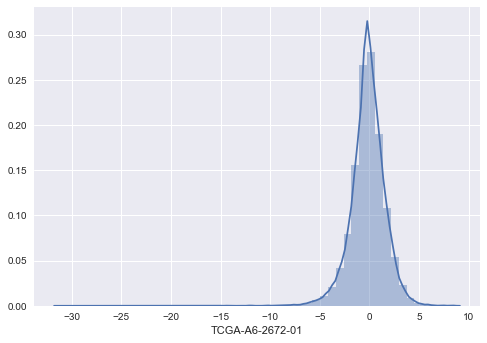

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

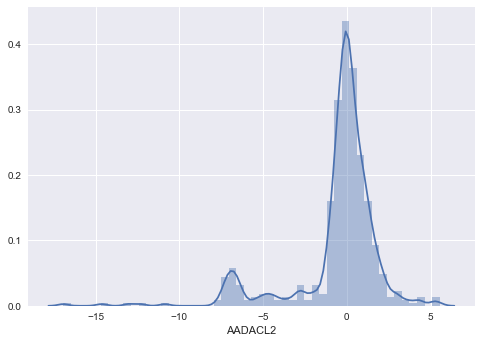

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_coad_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18340, 2)

# Save Gene List

In [56]:
filename = path+'tcga_coad_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [60]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [61]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [62]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-3L-AA1B-01,61,FEMALE,M0,N0,T2,Stage I,Colon Adenocarcinoma,Primary Solid Tumor,Colon,NaN
TCGA-4N-A93T-01,67,MALE,M0,N1b,T4a,Stage IIIB,Colon Adenocarcinoma,Primary Solid Tumor,Colon,NaN
TCGA-4T-AA8H-01,42,FEMALE,MX,N0,T3,Stage IIA,Colon Mucinous Adenocarcinoma,Primary Solid Tumor,Colon,NaN
TCGA-5M-AAT4-01,74,MALE,M1b,N0,T3,Stage IV,Colon Adenocarcinoma,Primary Solid Tumor,Colon,NaN
TCGA-5M-AAT5-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primary Solid Tumor,NaN,NaN


In [63]:
attribute_list.shape

(501, 10)

# Save Attribute List

In [64]:
filename = path+'tcga_coad_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [67]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [68]:
standard_matrix.head()

,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2671-01,TCGA-A6-2671-11,...,TCGA-QG-A5YV-01,TCGA-QG-A5YW-01,TCGA-QG-A5YX-01,TCGA-QG-A5Z1-01,TCGA-QG-A5Z2-01,TCGA-QL-A97D-01,TCGA-RU-A8FL-01,TCGA-SS-A7HO-01,TCGA-T9-A92H-01,TCGA-WS-AB45-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.668396,-0.919755,0.700749,0.536900,-0.564658,-0.931731,0.065789,0.281314,-0.640465,-0.033946,...,0.644788,-0.967624,0.736730,0.013912,-0.101815,0.504949,0.960558,0.197545,0.748718,-0.696318
A1CF,0.440075,-0.054916,-0.018985,-0.054916,0.144633,-0.984552,0.096745,-0.186602,-0.908777,0.759686,...,-0.003027,-0.721261,0.771698,0.711752,-0.669389,0.180537,-0.366185,0.719751,0.404148,-0.701299
A2M,0.914036,-0.870447,-0.874442,-0.615095,-0.643040,0.462474,0.626216,-0.024571,0.063225,0.706199,...,-0.507396,0.438505,-0.770699,0.598227,-0.818566,-0.359775,-0.958214,-0.279912,-0.758729,0.989957
A2ML1,0.250451,0.613857,0.941623,0.689772,0.821684,0.298347,0.042876,0.565919,0.374238,-0.511778,...,0.150644,0.470066,0.517976,0.462079,0.645828,-0.348208,0.589870,0.322338,0.106770,-0.112739
A3GALT2,-0.963824,0.748536,0.428900,0.572691,-0.728413,-0.516976,0.313121,0.053603,-0.205801,0.373030,...,0.692559,-0.899990,0.660593,0.816486,0.289121,0.532725,0.884419,0.932404,0.632572,-0.884025


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

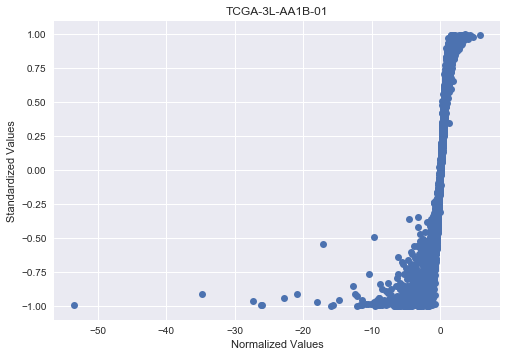

In [69]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [70]:
filename = path+'tcga_coad_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [71]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [72]:
tertiary_matrix.head()

,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2671-01,TCGA-A6-2671-11,...,TCGA-QG-A5YV-01,TCGA-QG-A5YW-01,TCGA-QG-A5YX-01,TCGA-QG-A5Z1-01,TCGA-QG-A5Z2-01,TCGA-QL-A97D-01,TCGA-RU-A8FL-01,TCGA-SS-A7HO-01,TCGA-T9-A92H-01,TCGA-WS-AB45-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,1,0,0,0
A1CF,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,1
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [73]:
filename = path+'tcga_coad_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [74]:
name = 'tcga_coad_gene_up_set'

In [75]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [76]:
name = 'tcga_coad_gene_down_set'

In [77]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [78]:
name = 'tcga_coad_attribute_up_set'

In [79]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [80]:
name = 'tcga_coad_attribute_down_set'

In [81]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [82]:
attribute_normalized_matrix = normalized_matrix.copy()

In [83]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [84]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [85]:
attribute_similarity_matix.head()

,"(Donor:TCGA-3L-AA1B, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-4N-A93T, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-4T-AA8H, Age:42.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Colon Mucinous Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-5M-AAT4, Age:74.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-5M-AAT4, Age:74.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-5M-AAT6, Age:40.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-5M-AAT6, Age:40.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-5M-AATE, Age:76.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-A6-2671, Age:85.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IV, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-A6-2671, Age:85.0, Gender:MALE, SampleType:Solid Tissue Normal, Stage:Stage IV, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)",...,"(Donor:TCGA-QG-A5YV, Age:64.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-QG-A5YW, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Colon Mucinous Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-QG-A5YX, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-QG-A5Z1, Age:71.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-QG-A5Z2, Age:61.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-QL-A97D, Age:84.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-RU-A8FL, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-SS-A7HO, Age:44.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-T9-A92H, Age:82.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)","(Donor:TCGA-WS-AB45, Age:52.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Colon Mucinous Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-3L-AA1B, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)",1.000000,0.050657,0.061446,0.107894,0.071716,0.076348,0.164661,0.143573,0.044483,0.082589,...,0.080784,0.091716,0.033762,0.169570,0.163568,0.037512,-0.055227,0.191867,0.115544,0.155416
"(Donor:TCGA-4N-A93T, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIB, Histology:Colon Adenocarcinoma, Tissue:Colon, Tumor:nan, Gradenan)",0.050657,1.000000,0.158822,0.125763,0.149189,-0.068035,0.038761,0.084956,0.038312,0.017863,...,0.144028,0.189102,0.129366,0.028462,0.080002,0.104286,0.196885,0.043621,0.181331,-0.1715

# Save Attribute Similarity Matrix

In [86]:
filename = path+'tcga_coad_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [87]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Create Gene Similarity Matrix

In [88]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [89]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.100857,-0.139068,-0.110378,0.106661,-0.121801,0.053437,-0.046039,-0.026134,-0.038747,...,0.046309,0.045527,0.155989,0.116964,0.019303,0.038653,0.092881,-0.073165,-0.080668,0.076372
A1CF,0.100857,1.000000,-0.064094,-0.129438,0.083521,-0.233563,-0.000402,-0.074821,0.041841,-0.024824,...,-0.180852,-0.005261,0.224770,0.130077,0.026091,-0.021919,0.079397,-0.212220,0.109571,-0.047656
A2M,-0.139068,-0.064094,1.000000,-0.059938,-0.331419,0.523904,-0.230198,-0.228980,-0.179727,-0.187990,...,-0.196419,-0.384689,-0.060264,-0.109905,-0.339714,-0.063657,0.203945,0.118455,0.352908,0.052760
A2ML1,-0.110378,-0.129438,-0.059938,1.000000,-0.022881,0.061576,0.001687,-0.078240,-0.073722,-0.013016,...,0.047254,-0.053701,0.006034,0.038003,0.020920,0.162427,-0.019599,0.045910,-0.059262,-0.003043
A3GALT2,0.106661,0.083521,-0.331419,-0.022881,1.000000,-0.204896,0.133672,0.025181,-0.005338,0.033381,...,0.069423,0.147642,0.136896,0.056104,0.125784,-0.009363,-0.018199,-0.110499,-0.109299,0.097176


# Save Gene Similarity Matrix

In [90]:
filename = path+'tcga_coad_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [91]:
name = 'tcga_coad_gene_attribute_edge_list'

In [92]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  501 Out of 501   

 The number of statisticaly relevent gene-attribute associations is: 459393
